0 번째 loss, accuracy:  1.3477062428453084 0.325
1 번째 loss, accuracy:  1.346372322655097 0.325
2 번째 loss, accuracy:  1.3450455517565905 0.325
3 번째 loss, accuracy:  1.3437258890494368 0.325
4 번째 loss, accuracy:  1.3424132936432203 0.325
5 번째 loss, accuracy:  1.3411077248577687 0.325
6 번째 loss, accuracy:  1.3398091422234637 0.325
7 번째 loss, accuracy:  1.3385175054814835 0.325
8 번째 loss, accuracy:  1.337232774584018 0.325
9 번째 loss, accuracy:  1.335954909694466 0.325
10 번째 loss, accuracy:  1.3346838711875662 0.325
11 번째 loss, accuracy:  1.3334196196495152 0.325
12 번째 loss, accuracy:  1.3321621158780501 0.325
13 번째 loss, accuracy:  1.3309113208825096 0.325
14 번째 loss, accuracy:  1.3296671958838355 0.325
15 번째 loss, accuracy:  1.328429702314555 0.325
16 번째 loss, accuracy:  1.3271988018187568 0.325
17 번째 loss, accuracy:  1.3259744562519822 0.325
18 번째 loss, accuracy:  1.32475662768116 0.325
19 번째 loss, accuracy:  1.3235452783844555 0.325
20 번째 loss, accuracy:  1.32234037085108 0.325
21 번째 loss

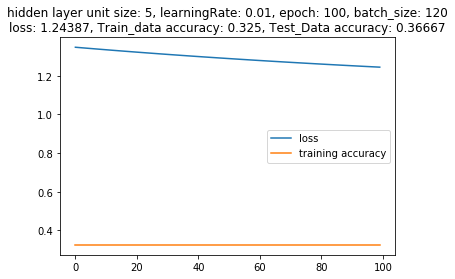

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from tlnn2 import TwoLayerNeuralNetwork2

""" iris Data """
iris = load_iris()
X = iris.data # iris data input
y = iris.target # iris target (label)

# 데이터 Split Use training : testing = 8 : 2 => 120 : 30
suffle = np.random.choice(X.shape[0], X.shape[0], replace=False)
for_train = suffle[:120]
for_test = suffle[120:]

# for training data (X, y)
X_train = X[for_train]
y_train = y[for_train]
# for testing data (X, y)
X_test = X[for_test]
y_test = y[for_test]

""" hidden layer의 Unit 수 = 5 """
input_size = 4
hidden_size = 5
output_size = 3
tn2 = TwoLayerNeuralNetwork2(input_size, hidden_size, output_size)
tn2.init_data(X_train, y_train)

""" hyperParameter 값 """
lr = 0.01
epoch = 100
batch_size = 120
check = True # loss와 accuracy의 추이와 Plt 확인

lossPlt = []
accPlt = []
lossPlt, accPlt = tn2.learn(lr, epoch, batch_size, check) # epoch번 반복한 loss와 accuracy의 List를 return 
    
lo = round(tn2.loss(X_train, y_train), 5)
Tr = round(tn2.accuracy(X_train, y_train), 5)
Te = round(tn2.accuracy(X_test, y_test), 5)

# loss와 training accuracy를 Plot
x = np.arange(epoch)
plt.plot(x, lossPlt, x, accPlt)
plt.legend(["loss", "training accuracy"]) # 각주
plt.title('hidden layer unit size: {}, learningRate: {}, epoch: {}, batch_size: {}\nloss: {}, Train_data accuracy: {}, Test_Data accuracy: {}'\
          .format(hidden_size, lr, epoch, batch_size, lo, Tr, Te))
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from tlnn2 import TwoLayerNeuralNetwork2

""" iris Data """
iris = load_iris()
X = iris.data # iris data input
y = iris.target # iris target (label)

# 데이터 Split Use training : testing = 8 : 2 => 120 : 30
suffle = np.random.choice(X.shape[0], X.shape[0], replace=False)
for_train = suffle[:120]
for_test = suffle[120:]

# for training data (X, y)
X_train = X[for_train]
y_train = y[for_train]
# for testing data (X, y)
X_test = X[for_test]
y_test = y[for_test]

""" hidden layer의 Unit 수 = 3, 5, 7"""
hidden_size = [3, 5, 7]
input_size = 4
output_size = 3

""" hyperParameter 값 변화하며 Test """
lr = [0.02, 0.01, 0.005] # learningRate 0.02, 0.01, 0.005
epoch = [1000, 5000, 10000] # epoch 1000, 5000, 10000
batch_size = [40, 60, 120] # batchSize 40, 60, 120
check = 2 # loss, accuracy file에 저장
idx = 0 # file 또는 png 이름에 추가될 번호

for hid in hidden_size:
    tn2 = TwoLayerNeuralNetwork2(input_size, hid, output_size)
    tn2.init_data(X_train, y_train) # Set Training Data
    for e in epoch:
        for l in lr:
            for b in batch_size:
                lossPlt = []
                accPlt = []
                
                # 학습: epoch번 반복한 loss와 accuracy의 List를 return 
                lossPlt, accPlt = tn2.learn(l, e, b, check, idx) 
                
                lo = round(tn2.loss(X_train, y_train), 5)
                Tr = round(tn2.accuracy(X_train, y_train), 5)
                Te = round(tn2.accuracy(X_test, y_test), 5)
                tn2.reset() # parameter값들 Reset 해주어야 한다.
                
                # loss와 training accuracy를 Plot
                x = np.arange(e)
                plt.plot(x, lossPlt, x, accPlt)
                plt.legend(["loss", "training accuracy"]) # 각주
                plt.title('hiddenSize: {}, lr: {}, epoch: {}, batchSize: {}\n loss: {}, Train_Acc: {}, Test_Acc: {}'\
                          .format(hid, l, e, b, lo, Tr, Te))
                plt.savefig('./Result/loss&acc{}.png'.format(idx), dpi=100)
                plt.clf()
                idx += 1

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>